# RONALD MULYOWA   
# (12/5/2020) 

# Project: Investigate  A No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be Analyzing a No-show appointments Kaggle dataset. The dataset contains collected information from 100k medical appointments in Brazil. Patients make appointments with doctors, they follow all the instructions given to them, and don't show up.   The main objective is to find the factors which influence patient showing up and not showing up for their scheduled appointments 


> The original problem is from https://www.kaggle.com/joniarroba/noshowappointments/home

In [68]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [69]:
# Load your data and print out a few lines. Perform operations to inspect data

med_df = pd.read_csv('KaggleV2-May-2016.csv')

In [70]:
# getting first five columns of data
med_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
# viewing the number of columns and rows in the dataset
med_df.shape

(110527, 14)

In [72]:
# Renaming columns to
med_df.rename(columns={'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship', 'Hipertension':'hypertension', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handcap', 'SMS_received':'sms_received', 'No-show':'no_show'},inplace=True)

In [73]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
# Checking  for duplicates
sum(med_df.duplicated())


0

In [75]:
# getting columns with null values
med_df.columns[med_df.isnull().any()].tolist()


[]

In [76]:
# fixing appointment, and schedule day and schedule to timestamp
#type(med_df[''][0])
med_df["appointment_day"] = pd.to_datetime(med_df["appointment_day"])




In [77]:
med_df["scheduled_day"] = pd.to_datetime(med_df["scheduled_day"])

In [78]:
# fixing the patient id data type
# The patient id is a float but it should be an it
med_df['patient_id'] = med_df['patient_id'].astype(int)
med_df.patient_id.dtype

dtype('int64')

In [79]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [80]:
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [81]:
# Adding a column for the day of the week for the patients appointment, This will help me in my analysis.This is going to return the days of the week with monday=0 and sunday=6 
med_df['appointment_weekday'] = med_df['appointment_day'].dt.weekday


In [82]:
# Adding the column for scheduled week day
med_df['scheduled_weekday'] = med_df['scheduled_day'].dt.weekday

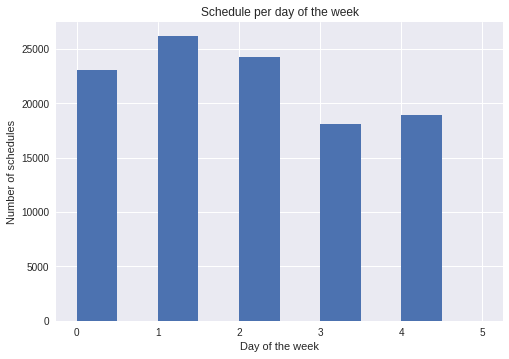

In [83]:
# Ploting a histogram to show the distribution of schedules with days of the week. I want to know which day of the week do patients often call in to schedule appointments with the doctors
med_df.scheduled_weekday.hist()
plt.title('Schedule per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of schedules')
plt.show()

### Observations
> Most patients schedule appointments on Tuesday and wednesday  <br />
> No patients schedule appointments on the weekends ie(satuday and sunday)

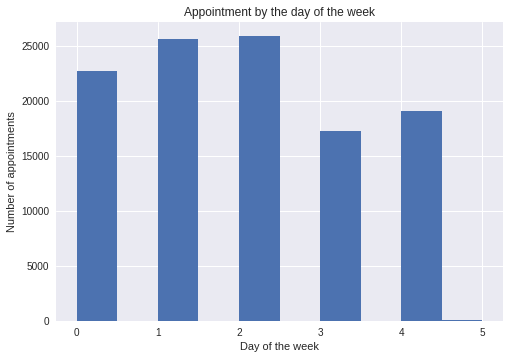

In [84]:
#Ploting a histogram to show the distribution of appointments with days of the week. I want to know which day of the week do scheduled patients meet up with the doctor 
med_df.appointment_weekday.hist()
plt.title('Appointment by the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of appointments')
plt.show()

### Observation
> Most patients are given appointments on Wednesday and Tuesday
>


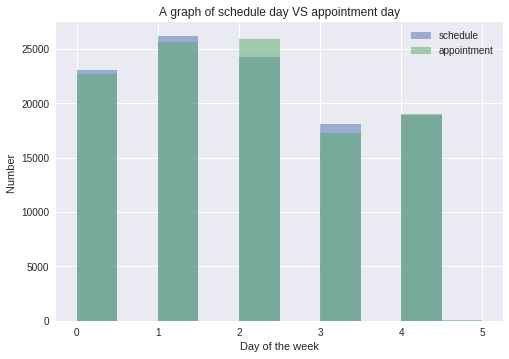

In [85]:
# plotting the two together to know how schedule day varied  with appointment day
plt.hist(med_df.scheduled_weekday, alpha=0.5, label='schedule')
plt.hist(med_df.appointment_weekday, alpha = 0.5, label= 'appointment')
plt.legend(loc='best')
plt.title('A graph of schedule day VS appointment day')
plt.xlabel('Day of the week')
plt.ylabel('Number ')
plt.show()


### Observations 
> The number of people who called in to be scheduled for appointment is greater than the number of people offered appointments on Monday, Tuesday, and Thursday.



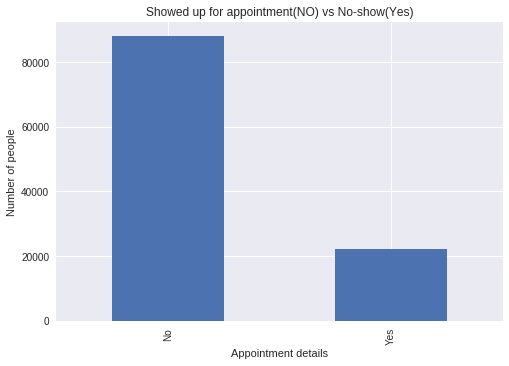

In [86]:
# A graph showing number of people who turned up for appointment (NO) and those who did not show up(Yes)

med_df.no_show.value_counts().plot(kind='Bar')
plt.title('Showed up for appointment(NO) vs No-show(Yes)')
plt.xlabel('Appointment details')
plt.ylabel('Number of people')
plt.show()

### Observation
> 80% of the patients attended their appointment.<br />
> 20% patients missed their appointments.

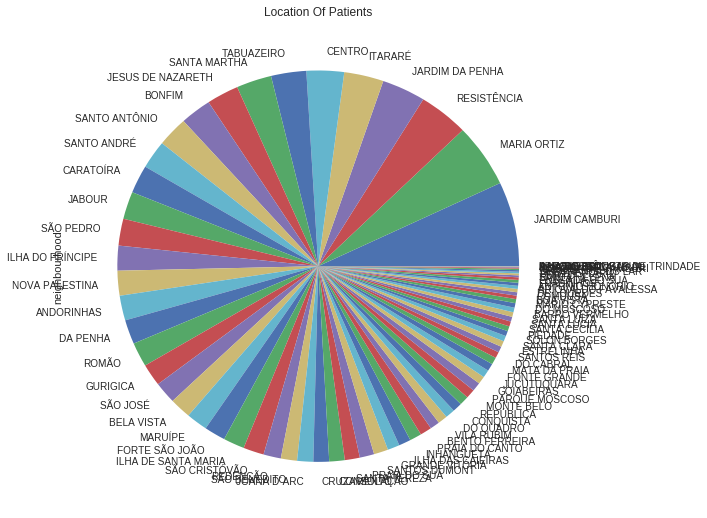

In [87]:
# Where do most patients live
med_df.neighbourhood.value_counts().plot(kind='pie', figsize=(9,9))
plt.title('Location Of Patients')
plt.show()


### Observations 
> Most patients live in Jardin Camburi

In [88]:
## finding the mean age of patients
mean_age = med_df.age.mean()
mean_age

37.08887421173107

In [89]:
## finding the mean age by gender
med_df.groupby('gender').age.mean()

gender
F    38.893987
M    33.736863
Name: age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### What gender is associated with most absenteesim?



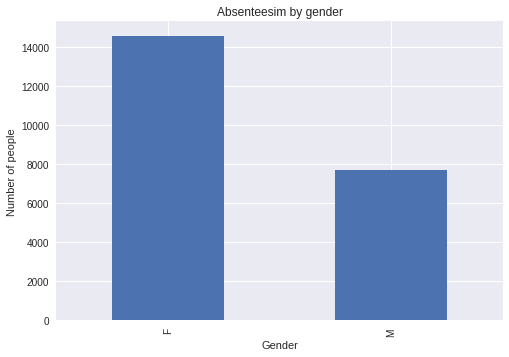

In [90]:
missed_appointment = med_df.query("no_show =='Yes'")
missed_appointment.gender.value_counts().plot(kind='bar')
plt.title('Absenteesim by gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

### Observation
> Of the total number missed 65% were female while 35% were male.


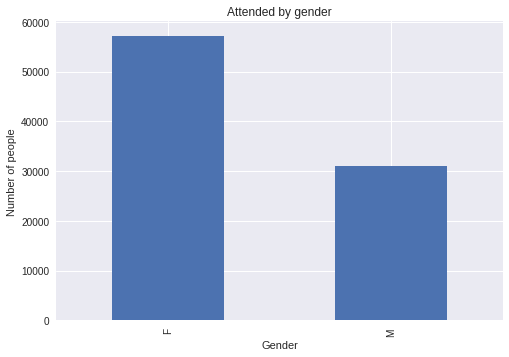

In [91]:
# patients who attended their appointments
attended_appointment = med_df.query("no_show =='No'")
attended_appointment.gender.value_counts().plot(kind='bar')
plt.title('Attended by gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

### Observation 
> Majority of the patients on appointment were females.


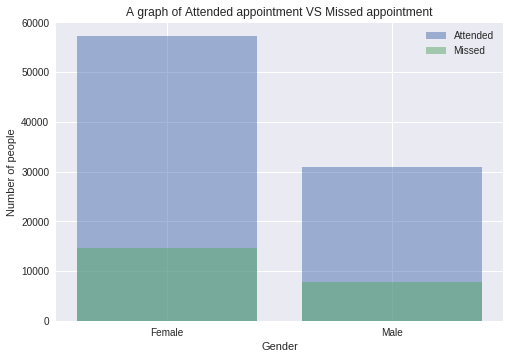

In [92]:
#  compairing between those that attended and those who missed to know which gender missed much.
locations = [1, 2]
xlabels = ['Female', 'Male']
plt.bar(locations, attended_appointment.gender.value_counts(), alpha=0.5, label='Attended', tick_label=xlabels)
plt.bar(locations, missed_appointment.gender.value_counts(), alpha=0.5, label='Missed', tick_label=xlabels)
plt.legend(loc='best')
plt.title('A graph of Attended appointment VS Missed appointment')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()


### Observations
  > 79.6% of the female patients attended their appointment schedules with just 20.4% missing their schedule.
  
  > 80% of the Male patients attended their appointments compaired to the 20% who missed.
  There is 0.4% chance that the female patient is likely to miss compaired to male patients.



### Which disease category is associated with the most  absenteeism?

In [93]:
# Which disease category is associated with the highest absenteeism
hyper = med_df.query("(hypertension == 1) & (no_show =='Yes')").hypertension.value_counts()
diabet = med_df.query("(diabetes ==1) & (no_show == 'Yes')").diabetes.value_counts()
alcohol = med_df.query("(alcoholism == 1) & (no_show == 'Yes')").alcoholism.value_counts()
hand = med_df.query("(handcap ==1) & (no_show == 'Yes')").handcap.value_counts()



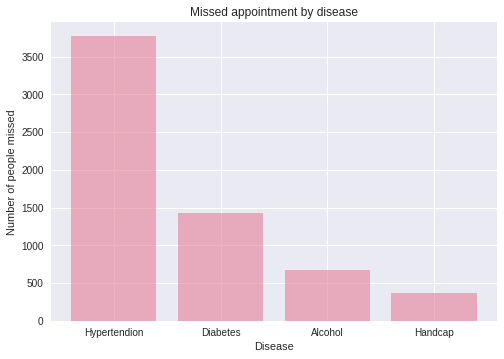

In [94]:
# ploting absenteeism against disease category
data = {'disease' : ['Hypertendion','Diabetes','Alcohol','Handcap'],
        'number_missed': [3772,1430, 677, 366]}

new_data = pd.DataFrame(data, columns=['disease', 'number_missed'])

locations =[1,2,3,4]
labels = ['Hypertendion','Diabetes','Alcohol','Handcap']
plt.bar(locations, new_data.number_missed, tick_label = labels, color = ( 0.9 , 0.5 , 0.6 , 0.6 ))
plt.title('Missed appointment by disease')
plt.xlabel('Disease')
plt.ylabel('Number of people missed')
plt.show()

### Observation
> Hypertension has the Most number of people who missed their appointments.<br />
> Handcap has the least number of people who missed.

In [95]:
# Attendence by disease category

hypert = med_df.query("(hypertension == 1) & (no_show =='No')").hypertension.value_counts()
diabett = med_df.query("(diabetes ==1) & (no_show == 'No')").diabetes.value_counts()
alcoholt = med_df.query("(alcoholism == 1) & (no_show == 'No')").alcoholism.value_counts()
handt = med_df.query("(handcap ==1) & (no_show == 'No')").handcap.value_counts()




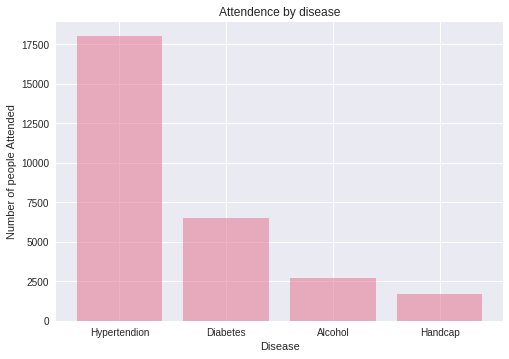

In [96]:

data = {'disease' : ['Hypertendion','Diabetes','Alcohol','Handcap'],
        'number_attended': [18029, 6513, 2683, 1676]}

new_datat = pd.DataFrame(data, columns=['disease', 'number_attended'])

locations =[1,2,3,4]
labels = ['Hypertendion','Diabetes','Alcohol','Handcap']
plt.bar(locations, new_datat.number_attended, tick_label = labels, color = ( 0.9 , 0.5 , 0.6 , 0.6 ))
plt.title('Attendence by disease')
plt.xlabel('Disease')
plt.ylabel('Number of people Attended')
plt.show()

### Observations
> Hypertension has the most number of people who attended their appointments. <br />
> Handcap category had the least number of people who attended their appointments.

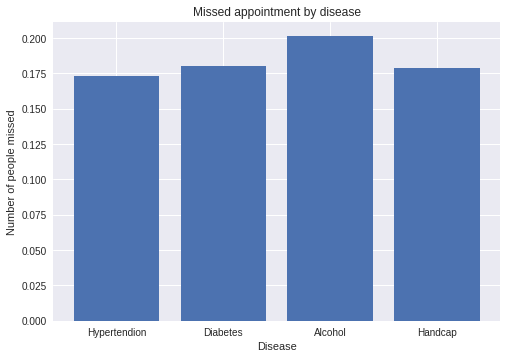

In [97]:
# Getting the percentage miss by disease category to know which category missed greate

pecentage_miss_hypertension = hyper /sum(hyper,hypert)
percentage_miss_diabet = diabet / sum(diabet, diabett)
percentage_miss_alcohiol = alcohol /sum(alcohol, alcoholt)
percentage_miss_handcap = hand  / sum(hand, handt)

data = {'disease' : ['Hypertendion','Diabetes','Alcohol','Handcap'],
        'number_missedt': [0.17302 , 0.180033, 0.201488 ,0.179236]}
missed_dt = pd.DataFrame(data, columns=['disease','number_missedt'])
locations = [1,2,3,4]
labels = ['Hypertendion','Diabetes','Alcohol','Handcap']

plt.bar(locations,missed_dt.number_missedt, tick_label = labels)
plt.title('Missed appointment by disease')
plt.xlabel('Disease')
plt.ylabel('Number of people missed')

plt.show()
    
      
                  

### Observations
>Patients with alcoholism miss their appointments most followed by handcaped patients.<br />
>Hypertension has the least missed appointments


<a id='conclusions'></a>
## Conclusions

> Most patients live in Jardin Camburi
> Most patients schedule appointments on Tuesday and wednesday. <br />
> No patients schedule appointments on the weekends ie(satuday and sunday). <br />
> Most patients are given appointments on Wednesday and Tuesday. <br />
> 80% of the patients attended their appointment. <br />
> 20% patients missed their appointments. <br />
> Of the total number missed 65% were female while 35% were male. <br />
> 79.6% of the female patients attended their appointment schedules with just 20.4% missing their schedule. <br />
> 80% of the Male patients attended their appointments compaired to the 20% who missed. <br />
  There is 0.4% chance that the female patient is likely to miss compaired to male patients. <br />
> Patients with alcoholism miss their appointments most followed by handcaped patients. <br />
> Hypertension has the least missed appointments. <br />  




In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0